In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
data_path = '../data/sample_invoice.csv'

In [3]:
df = pd.read_csv(data_path)

In [4]:
display(df.head())

,description,category,unit_cost,quantity,total,emergency,requires_auth,is_duplicate,violation
0,Procedure without prior auth,Therapy,780.35,3,2341.05,0,1,0,0
1,Follow-up appointment,Follow-Up,1903.89,3,5711.67,0,0,0,0
2,X-ray for left leg,Pharmacy,1477.39,2,2954.78,0,0,0,0
3,Physical therapy session,Consultation,1217.38,1,1217.38,0,1,0,1
4,Consultation with physician,Procedure,354.24,3,1062.72,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   description    500 non-null    object 
 1   category       500 non-null    object 
 2   unit_cost      500 non-null    float64
 3   quantity       500 non-null    int64  
 4   total          500 non-null    float64
 5   emergency      500 non-null    int64  
 6   requires_auth  500 non-null    int64  
 7   is_duplicate   500 non-null    int64  
 8   violation      500 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 35.3+ KB


EDA


In [6]:
df.isnull().sum()

description      0
category         0
unit_cost        0
quantity         0
total            0
emergency        0
requires_auth    0
is_duplicate     0
violation        0
dtype: int64

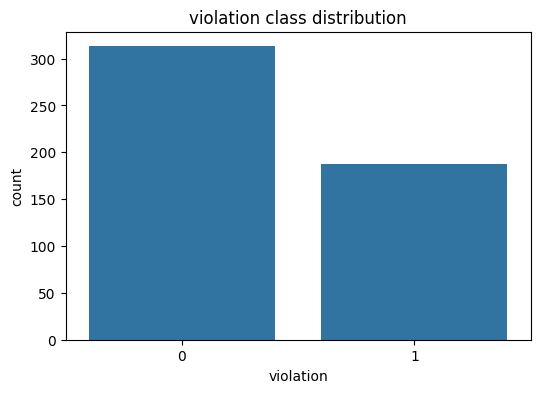

In [9]:
#Target variable distribution - violation counts
plt.figure(figsize=(6,4))
sns.countplot(x='violation', data =df)
plt.title("violation class distribution")
plt.xlabel('violation')
plt.ylabel('count')
plt.show()

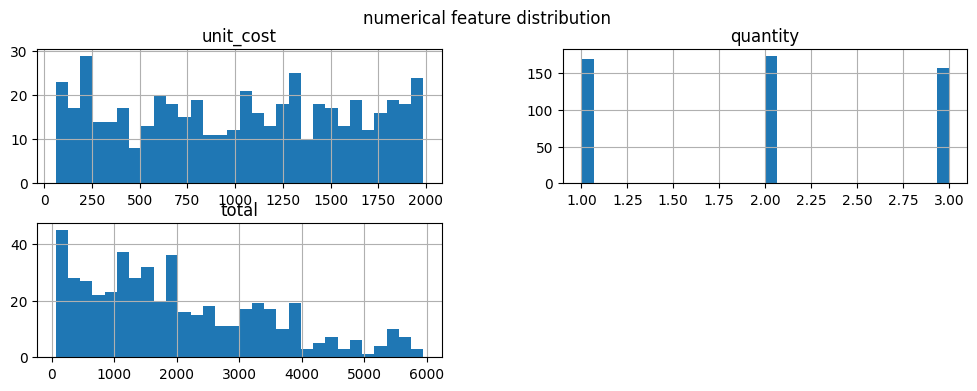

In [10]:

num_cols = ['unit_cost', 'quantity', 'total']
df[num_cols].hist(bins=30, figsize=(12,4))
plt.suptitle("numerical feature distribution")
plt.show()

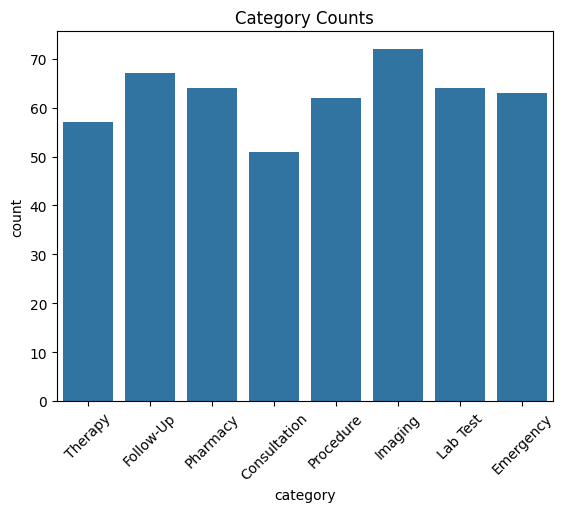

In [11]:
sns.countplot(x='category', data = df)
plt.title('Category Counts')
plt.xticks(rotation=45)
plt.show()

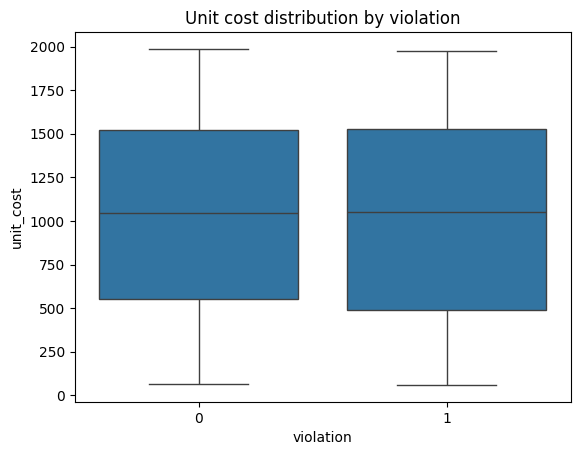

In [12]:
sns.boxplot(x='violation', y='unit_cost', data = df)
plt.title('Unit cost distribution by violation')
plt.show()

#Feature Engineering

In [13]:
df.head()

,description,category,unit_cost,quantity,total,emergency,requires_auth,is_duplicate,violation
0,Procedure without prior auth,Therapy,780.35,3,2341.05,0,1,0,0
1,Follow-up appointment,Follow-Up,1903.89,3,5711.67,0,0,0,0
2,X-ray for left leg,Pharmacy,1477.39,2,2954.78,0,0,0,0
3,Physical therapy session,Consultation,1217.38,1,1217.38,0,1,0,1
4,Consultation with physician,Procedure,354.24,3,1062.72,0,0,0,0


In [8]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
ohe = OneHotEncoder(sparse_output=False, drop='first')
cat_encoded = ohe.fit_transform(df[['category']])
cat_encoded_df = pd.DataFrame(cat_encoded, columns=ohe.get_feature_names_out(['category']))


In [13]:
cat_encoded_df

,category_Emergency,category_Follow-Up,category_Imaging,category_Lab Test,category_Pharmacy,category_Procedure,category_Therapy
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
495,0.0,0.0,0.0,0.0,1.0,0.0,0.0
496,0.0,1.0,0.0,0.0,0.0,0.0,0.0
497,1.0,0.0,0.0,0.0,0.0,0.0,0.0
498,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=100)
desc_tfidf = tfidf.fit_transform(df['description'])
desc_tfidf_df = pd.DataFrame(desc_tfidf.toarray(), columns=tfidf.get_feature_names_out())

In [15]:
desc_tfidf_df

,amoxicillin,appointment,auth,blood,consultation,duplicate,emergency,follow,for,left,...,routine,scan,session,test,therapy,unnecessary,up,visit,with,without
0,0.0,0.00000,0.526483,0.0,0.00000,0.0,0.00000,0.00000,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.00000,0.00000,0.410425
1,0.0,0.57735,0.000000,0.0,0.00000,0.0,0.00000,0.57735,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.00000,0.0,0.57735,0.00000,0.00000,0.000000
2,0.0,0.00000,0.000000,0.0,0.00000,0.0,0.00000,0.00000,0.5,0.5,...,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.00000,0.00000,0.000000
3,0.0,0.00000,0.000000,0.0,0.00000,0.0,0.00000,0.00000,0.0,0.0,...,0.0,0.0,0.57735,0.0,0.57735,0.0,0.00000,0.00000,0.00000,0.000000
4,0.0,0.00000,0.000000,0.0,0.57735,0.0,0.00000,0.00000,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.00000,0.57735,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.00000,0.000000,0.0,0.00000,0.0,0.00000,0.00000,0.5,0.5,...,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.00000,0.00000,0.000000
496,0.0,0.00000,0.526483,0.0,0.00000,0.0,0.00000,0.00000,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.00000,0.00000,0.410425
497,0.0,0.00000,0.526483,0.0,0.00000,0.0,0.00000,0.00000,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.00000,0.00000,0.410425
498,0.0,0.00000,0.526483,0.0,0.00000,0.0,0.00000,0.00000,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.00000,0.00000,0.410425


In [19]:
other_features = df[['unit_cost', 'quantity', 'total', 'emergency', 'requires_auth', 'is_duplicate']].reset_index(drop=True)

X = pd.concat([other_features, cat_encoded_df, desc_tfidf_df], axis=1)
y= df['violation']

In [20]:
X
y


0      0
1      0
2      0
3      1
4      0
      ..
495    0
496    1
497    1
498    1
499    0
Name: violation, Length: 500, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify=y, random_state=42)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [25]:
Y_pred = rf.predict(X_test)

In [26]:
print("Classification Report\n")
print(classification_report(Y_test, Y_pred))

Classification Report

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        78
           1       0.84      0.89      0.87        47

    accuracy                           0.90       125
   macro avg       0.89      0.90      0.89       125
weighted avg       0.90      0.90      0.90       125



In [28]:
print("Confusion Matrix\n")
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

Confusion Matrix

[[70  8]
 [ 5 42]]


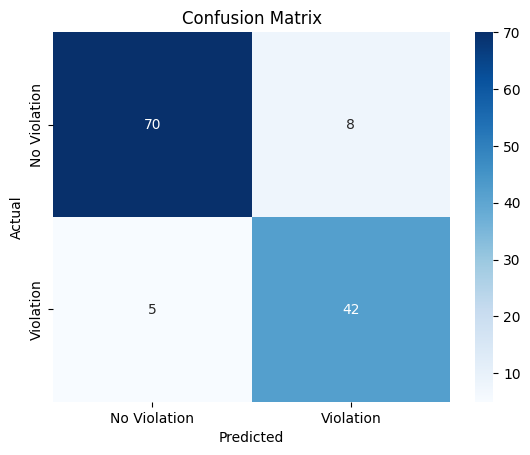

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Violation', 'Violation'],
            yticklabels= ['No Violation', 'Violation'],)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [34]:
importances = rf.feature_importances_
features = X.columns

feat_df = pd.DataFrame({'features': features, 'importances':importances})
feat_df = feat_df.sort_values(by='importances', ascending=False)
feat_df

,features,importances
4,requires_auth,0.196349
5,is_duplicate,0.130822
0,unit_cost,0.109372
2,total,0.105794
42,without,0.050186
1,quantity,0.035490
36,test,0.031188
3,emergency,0.029332
18,duplicate,0.028559
38,unnecessary,0.027851


/var/folders/9r/2q20x75923g7w6r2y94yzv3c0000gn/T/ipykernel_89126/2937120476.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importances', y='features', data=feat_df.head(15), palette='viridis')


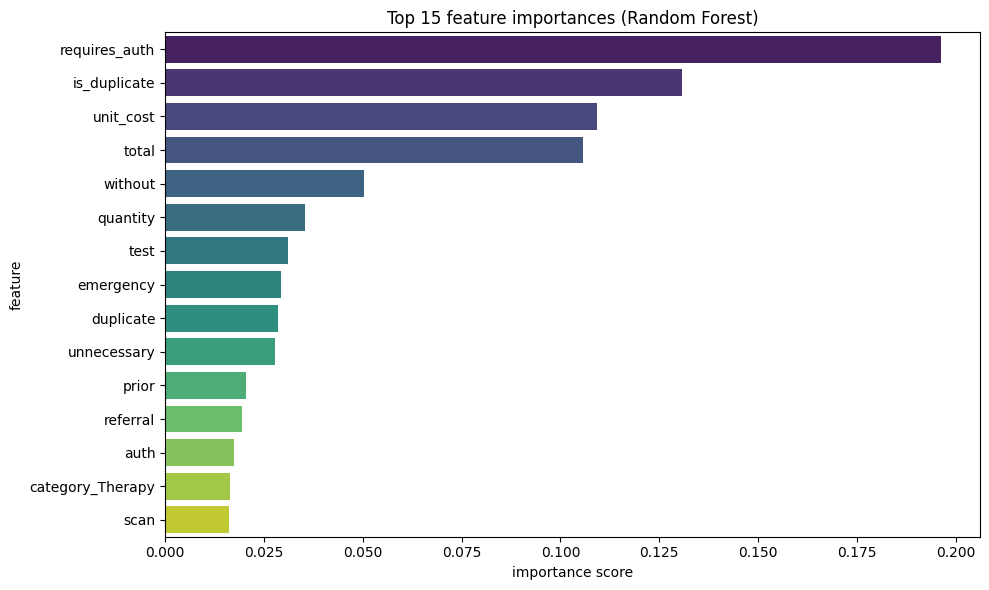

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(x='importances', y='features', data=feat_df.head(15), palette='viridis')
plt.title('Top 15 feature importances (Random Forest)')
plt.xlabel('importance score')
plt.ylabel('feature')
plt.tight_layout()
plt.show()

In [40]:
import shap
explainer = shap.TreeExplainer(rf)

In [41]:
shap_values = explainer.shap_values(X_test)

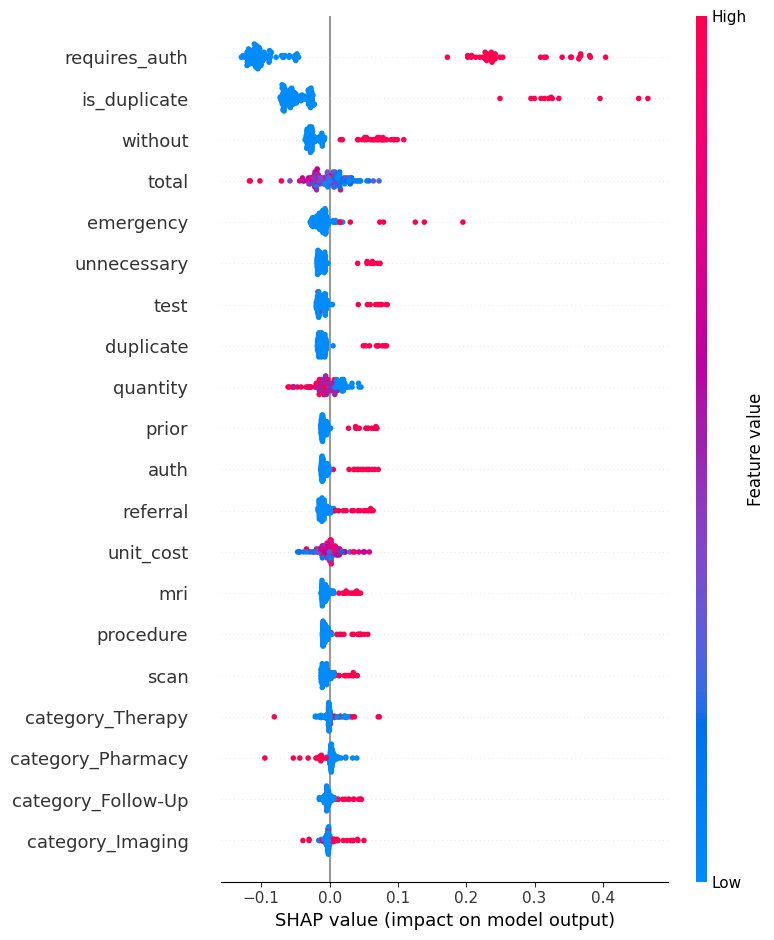

In [46]:
shap.summary_plot(shap_values[:,:,1], X_test)

In [47]:
#Saving the model

In [48]:
import joblib
import os




In [50]:
joblib.dump(rf,"../models/rf_model.pkl")

['../models/rf_model.pkl']

In [51]:
joblib.dump(tfidf, "../models/tfidf_vectorizer.pkl")
joblib.dump(ohe, "../models/ohe_encoder.pkl")

['../models/ohe_encoder.pkl']

In [52]:
joblib.dump(X.columns.to_list(), "../models/feature_cols.pkl")

['../models/feature_cols.pkl']